In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

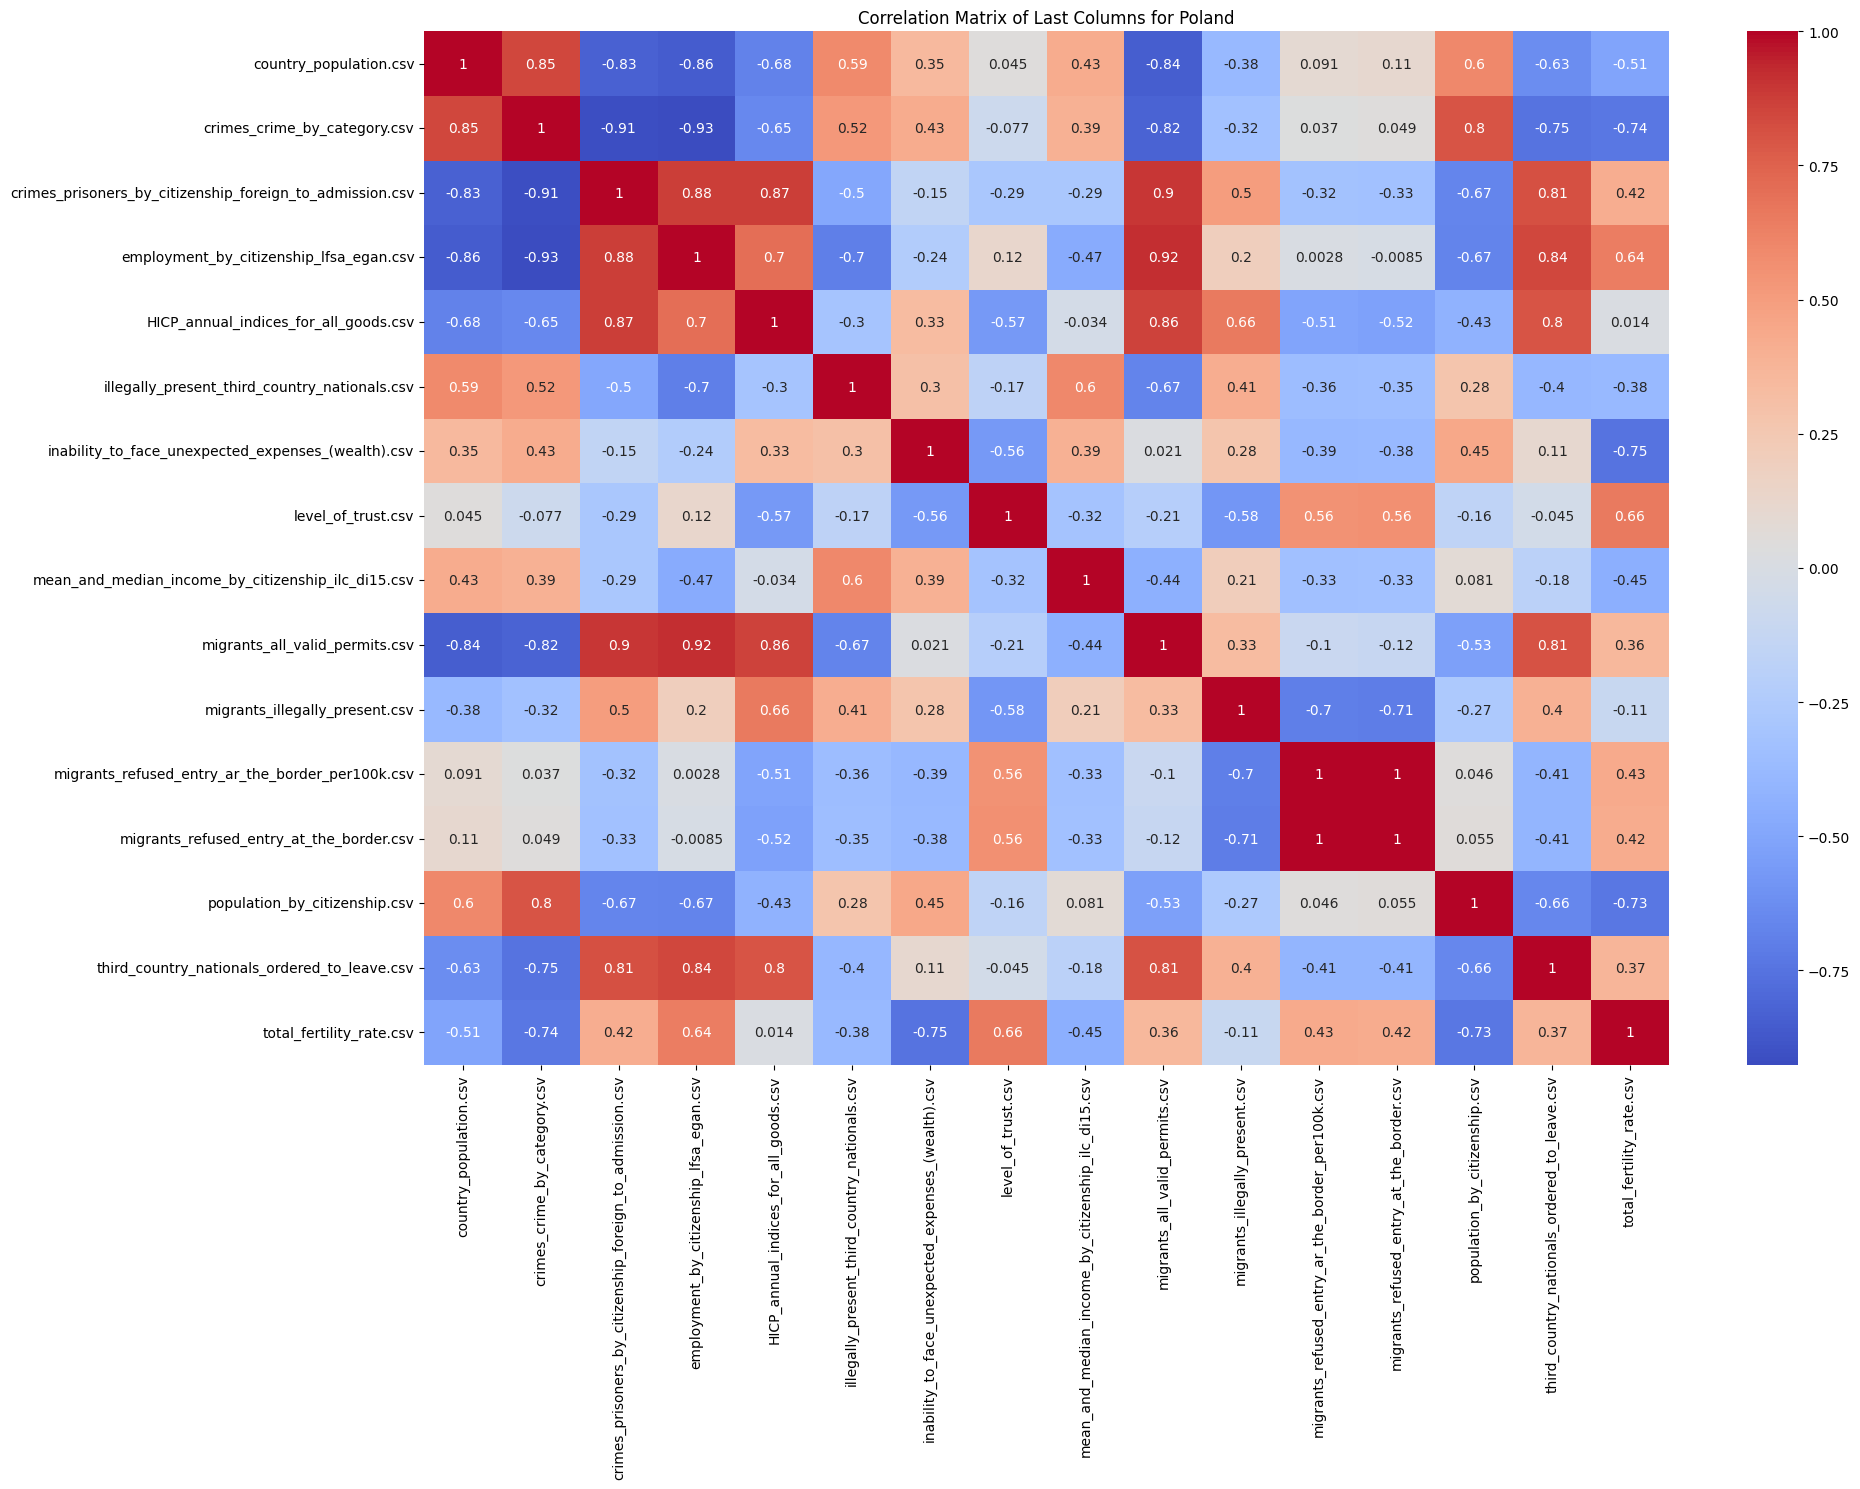

In [ ]:
def cor_matrix_per_country(country_name):
    folder_path = r'../processed_data'

    value_column = {}

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        if not os.path.isfile(file_path) or not filename.endswith('.csv'):
            continue
        
        try:
            df = pd.read_csv(file_path)
            
            if 'geo' in df.columns:
                df = df[df['geo'] == country_name]
            
            if df.empty:
                continue
            
            last_col_name = df.columns[-1]
            last_col_data = df.iloc[:, -1]
            
            value_column[filename] = last_col_data.reset_index(drop=True)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

    combined_df = pd.DataFrame(value_column)
    combined_df.dropna(inplace=True)
    corr_matrix = combined_df.corr()

    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix of Last Columns for {country_name}')
    plt.tight_layout()
    plt.show()

cor_matrix_per_country('Poland') 


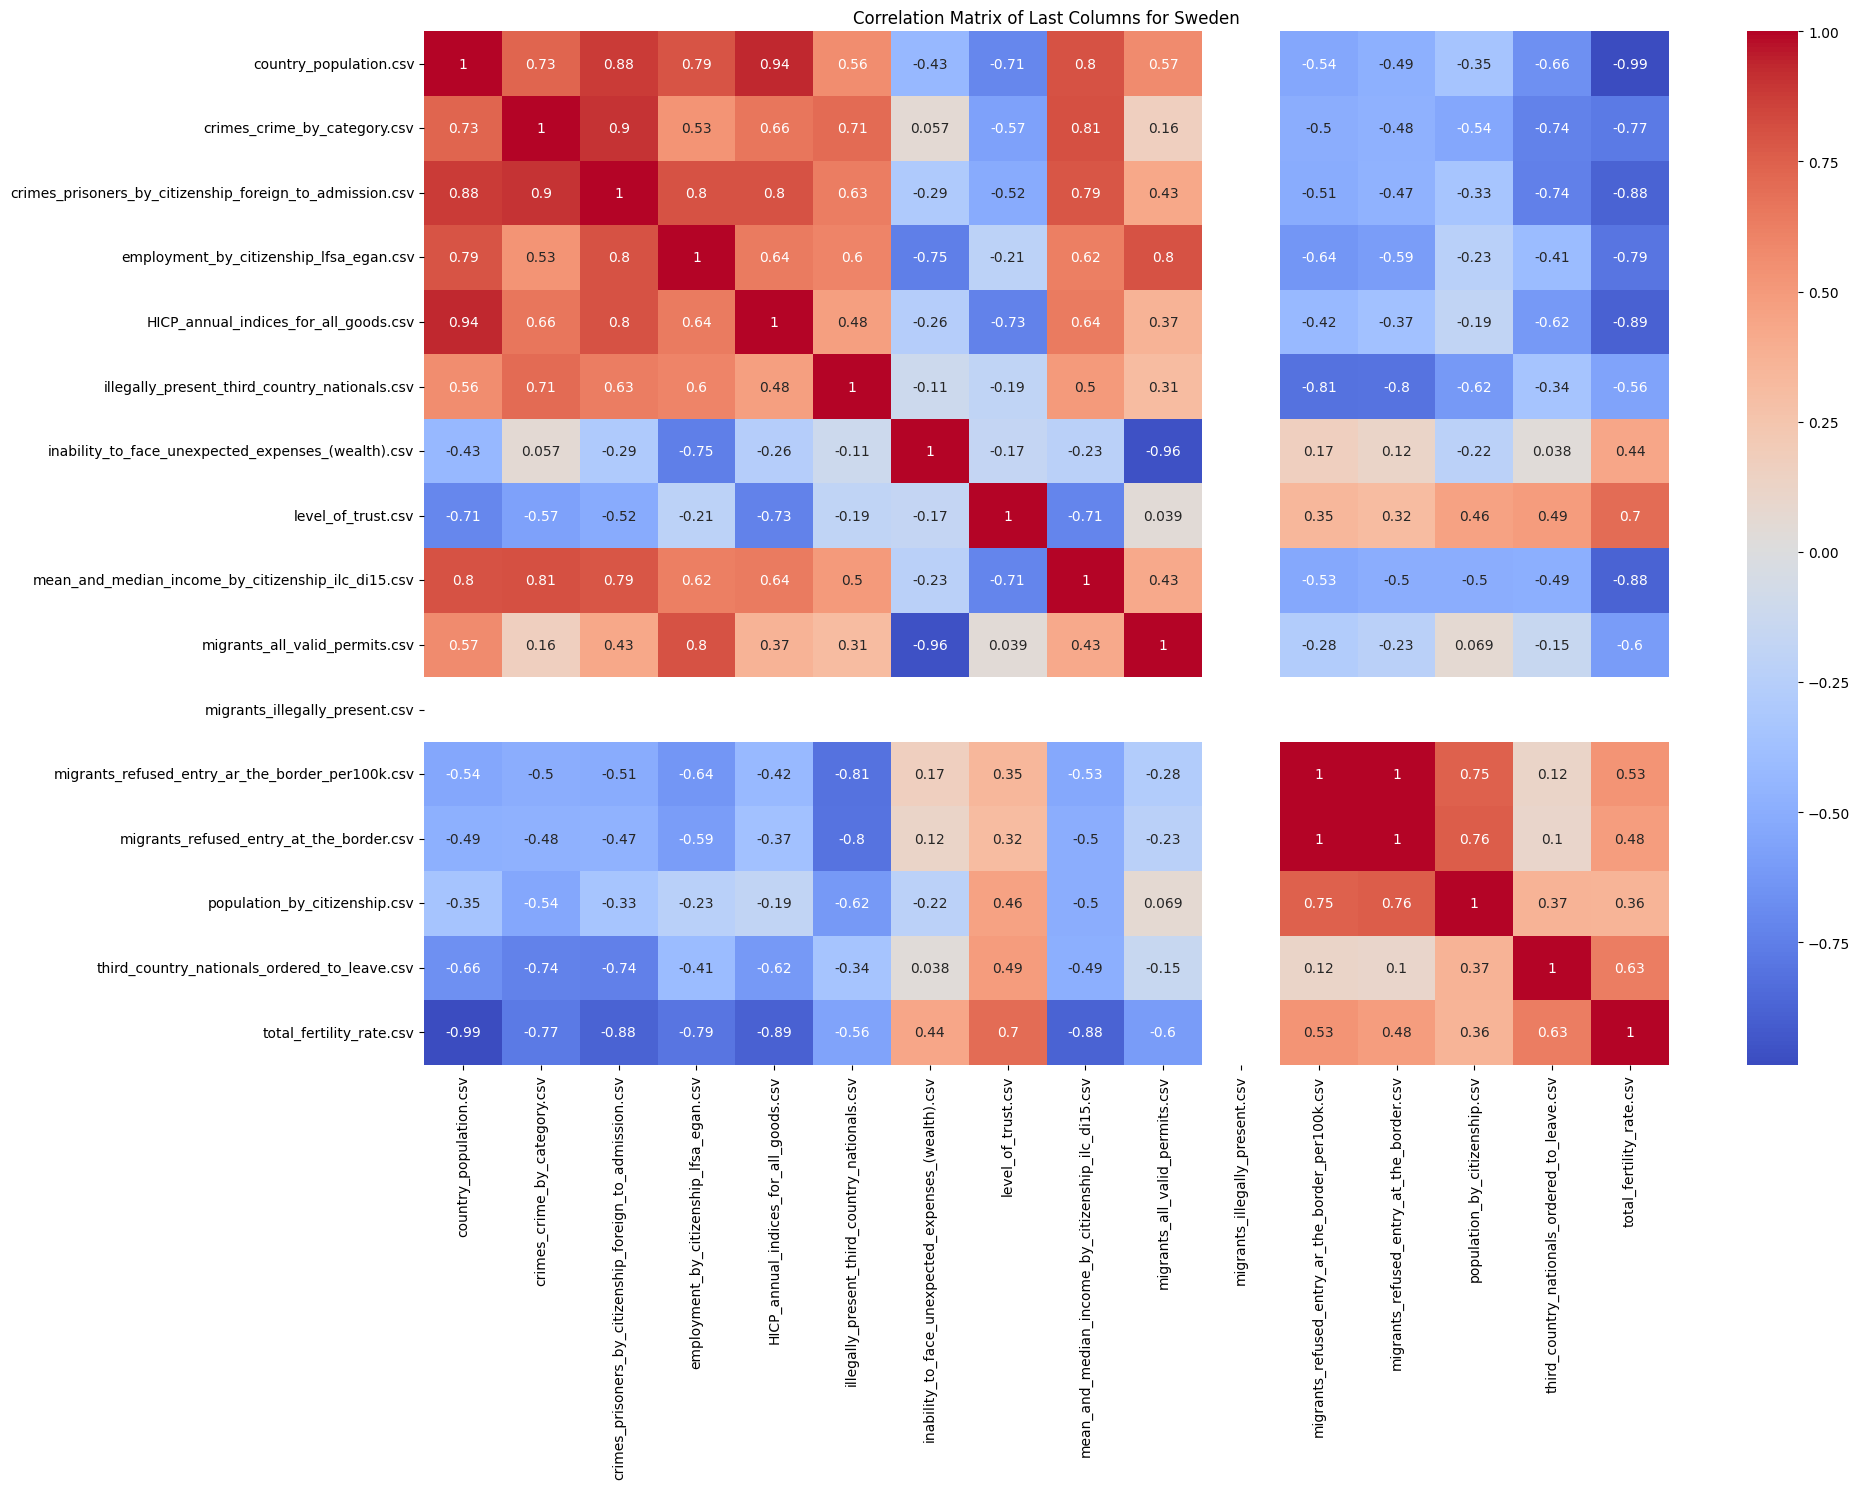

In [8]:
cor_matrix_per_country('Sweden')

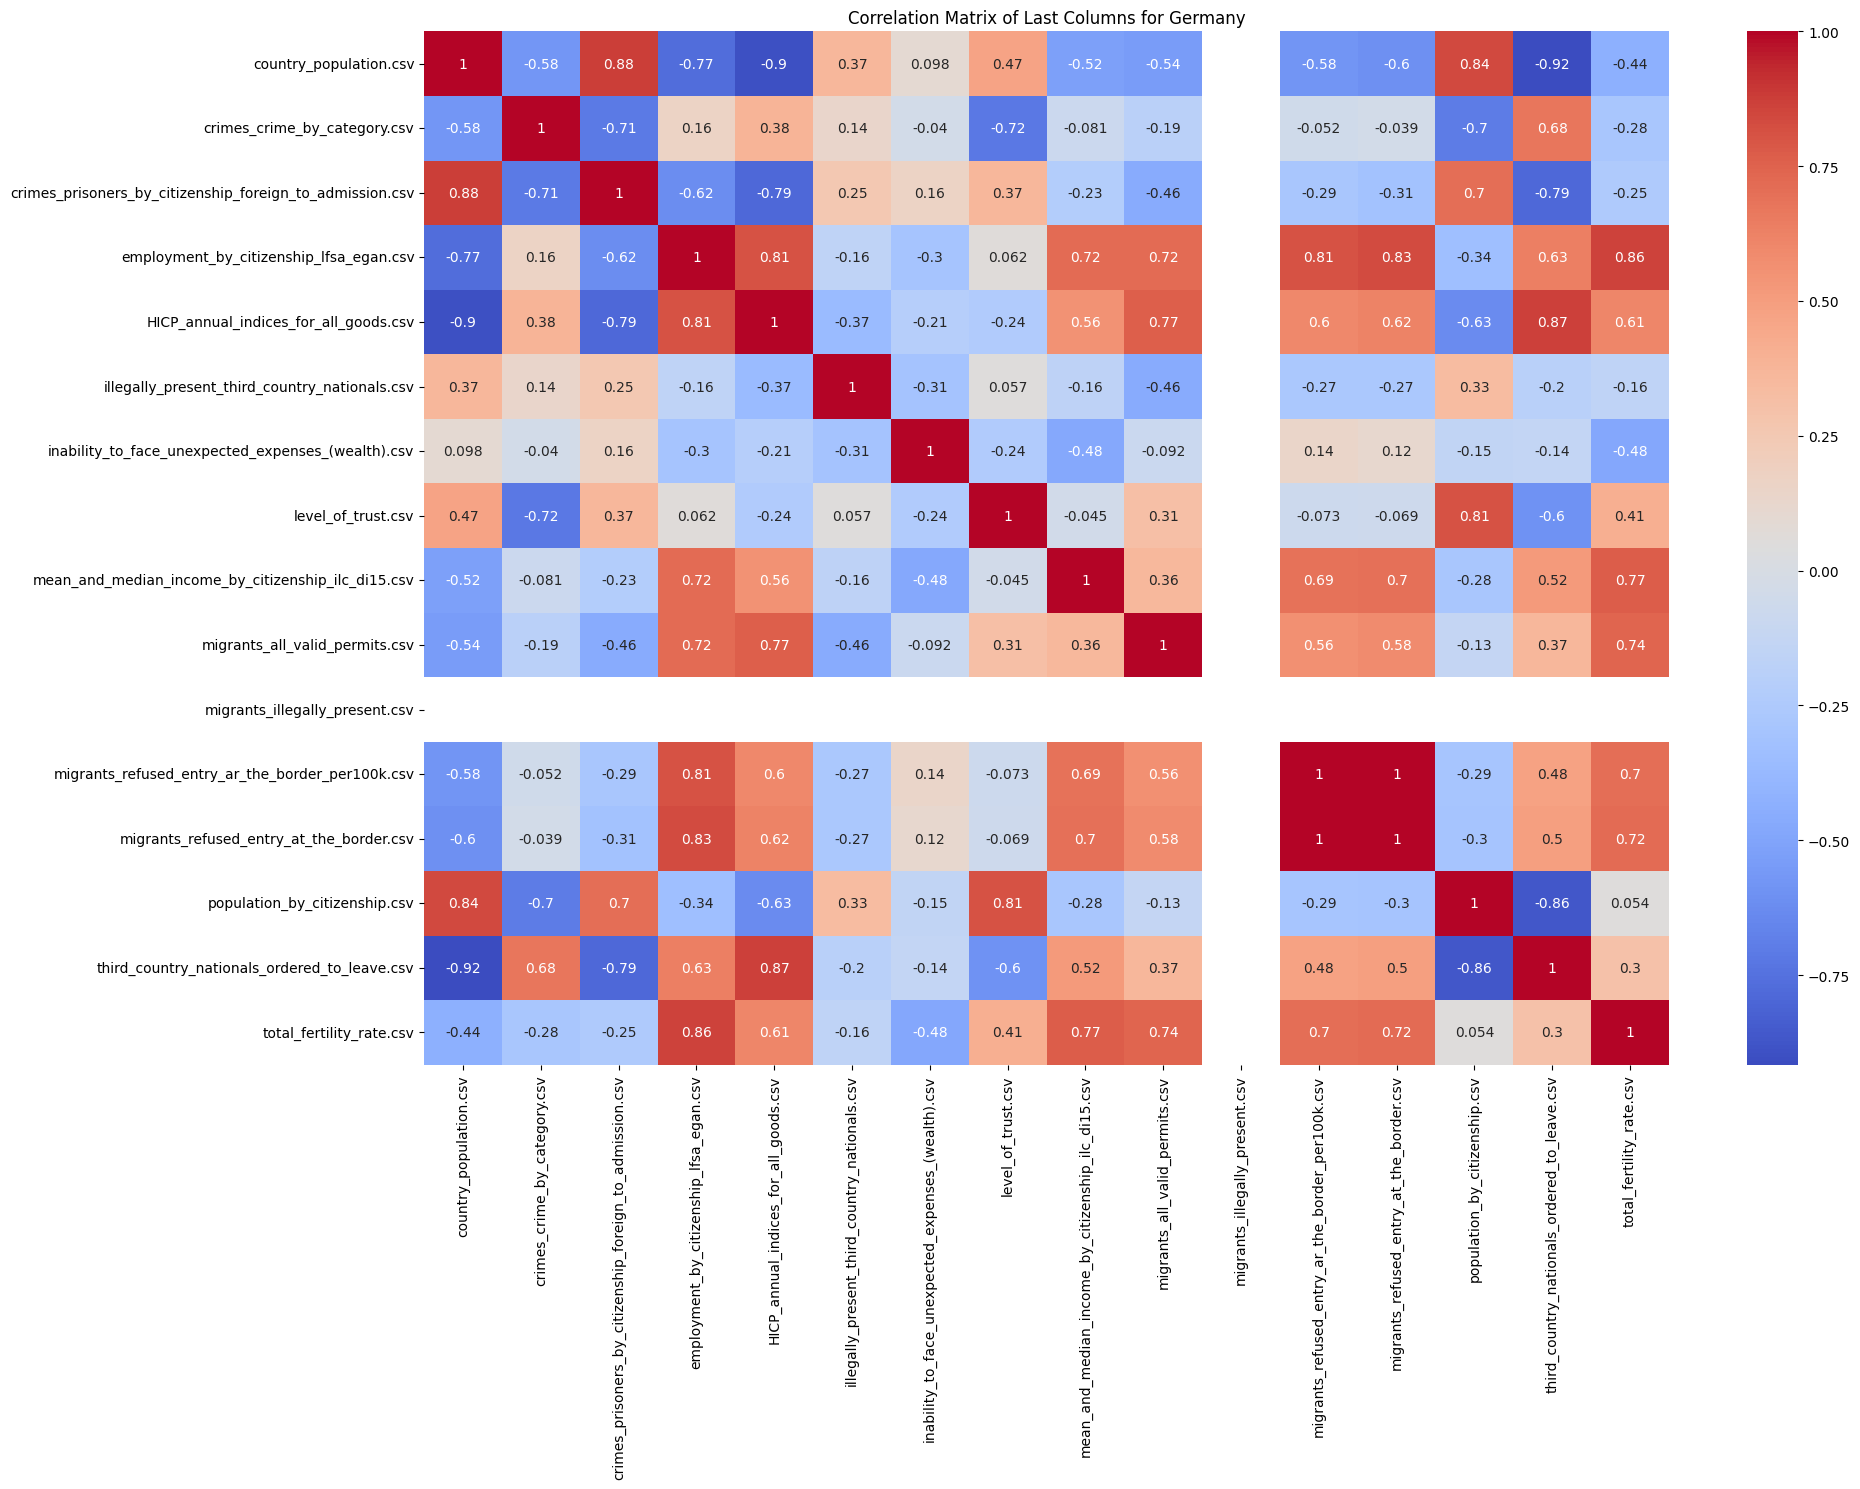

In [5]:
cor_matrix_per_country('Germany')

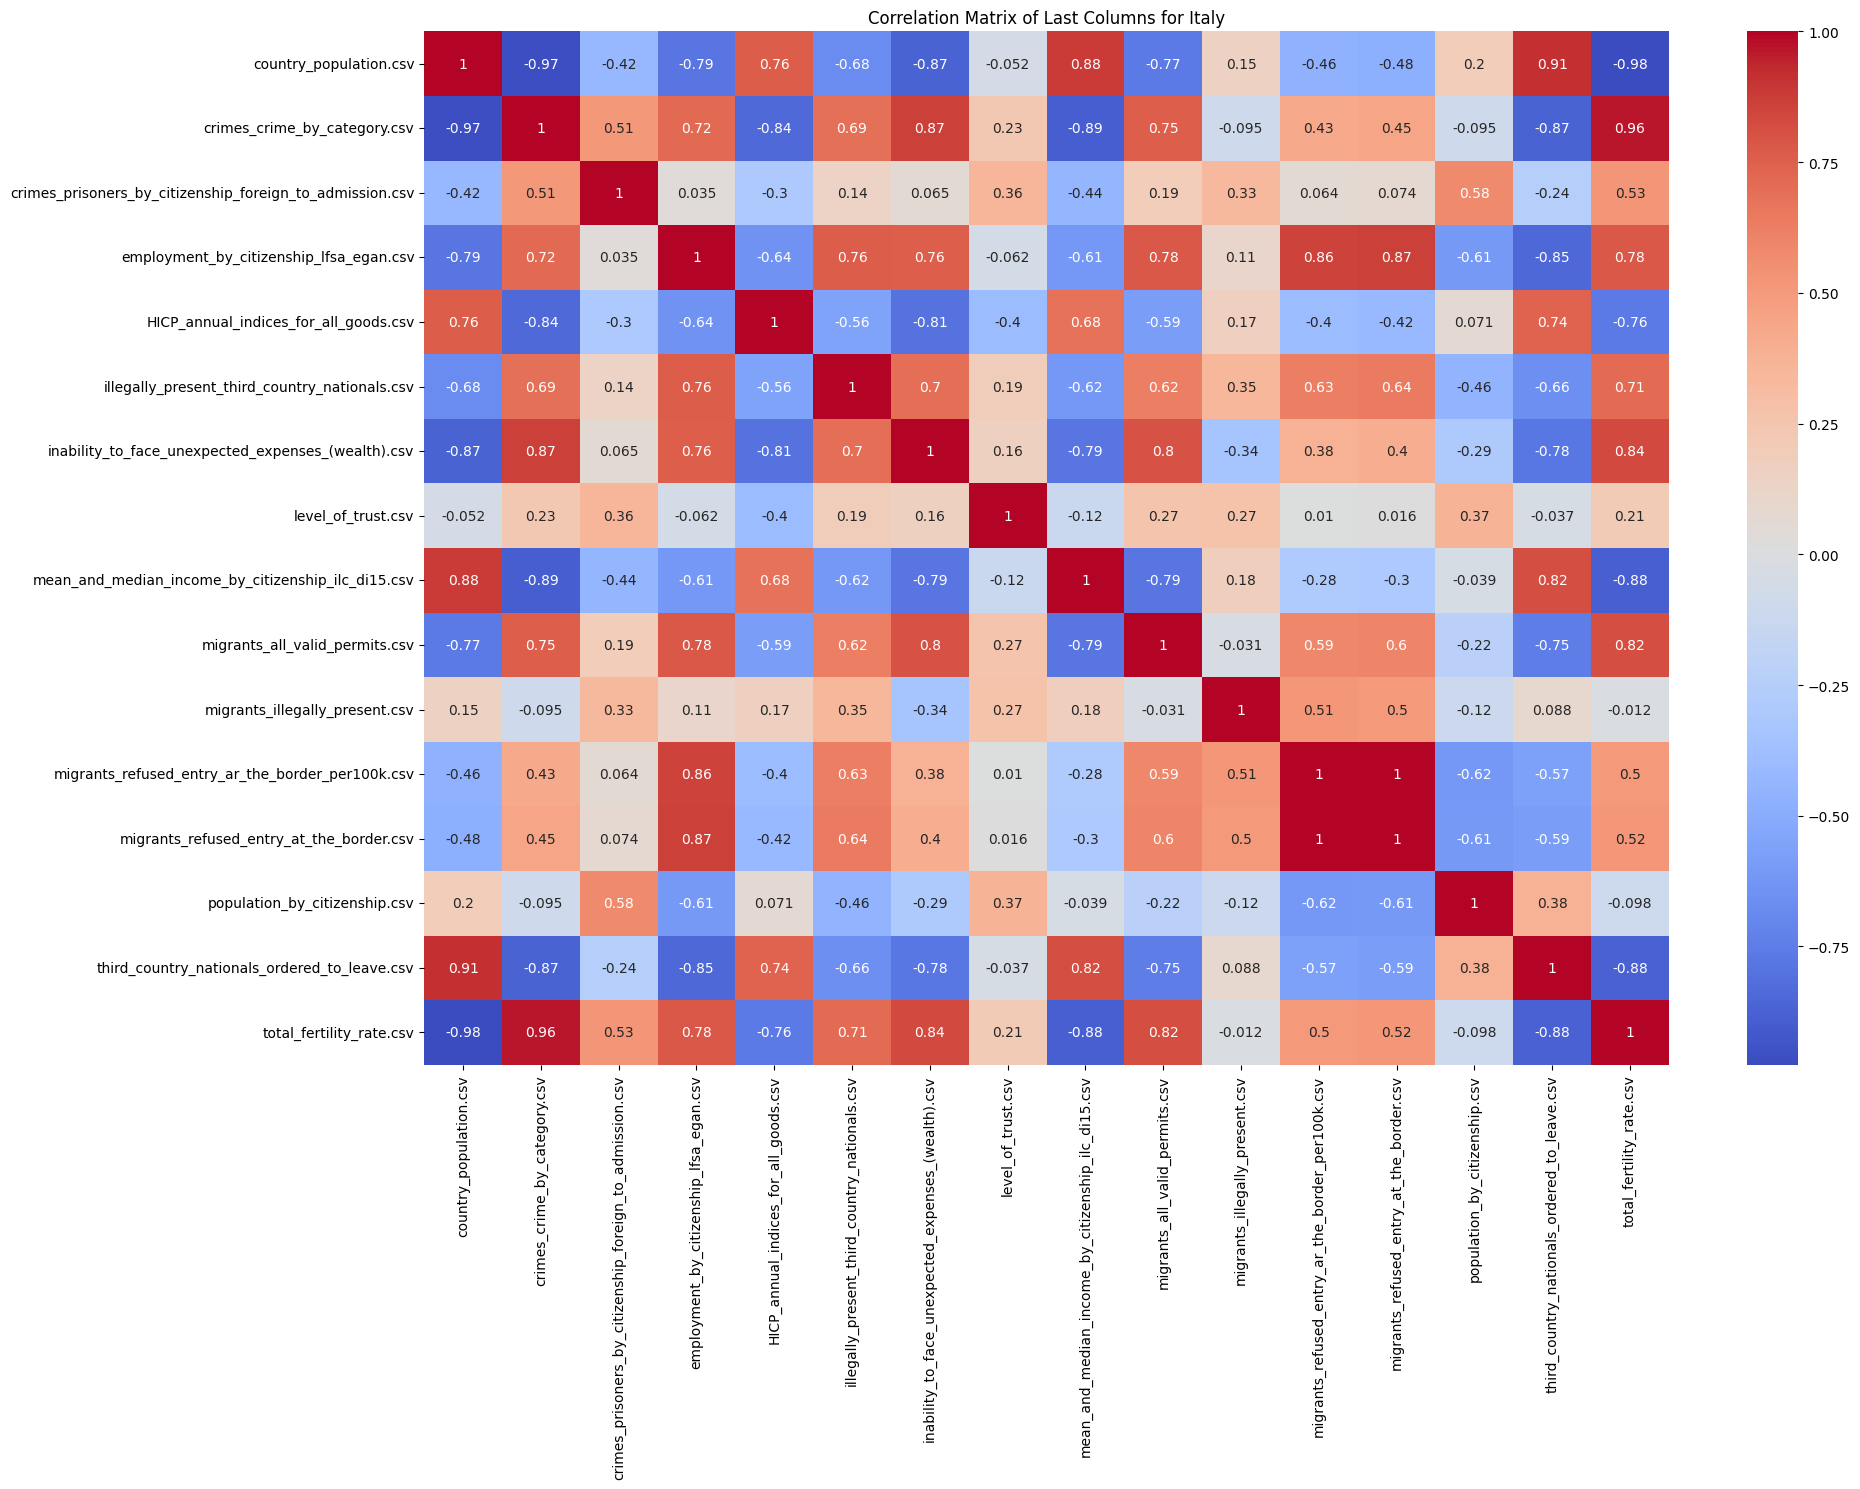

In [9]:
cor_matrix_per_country('Italy')

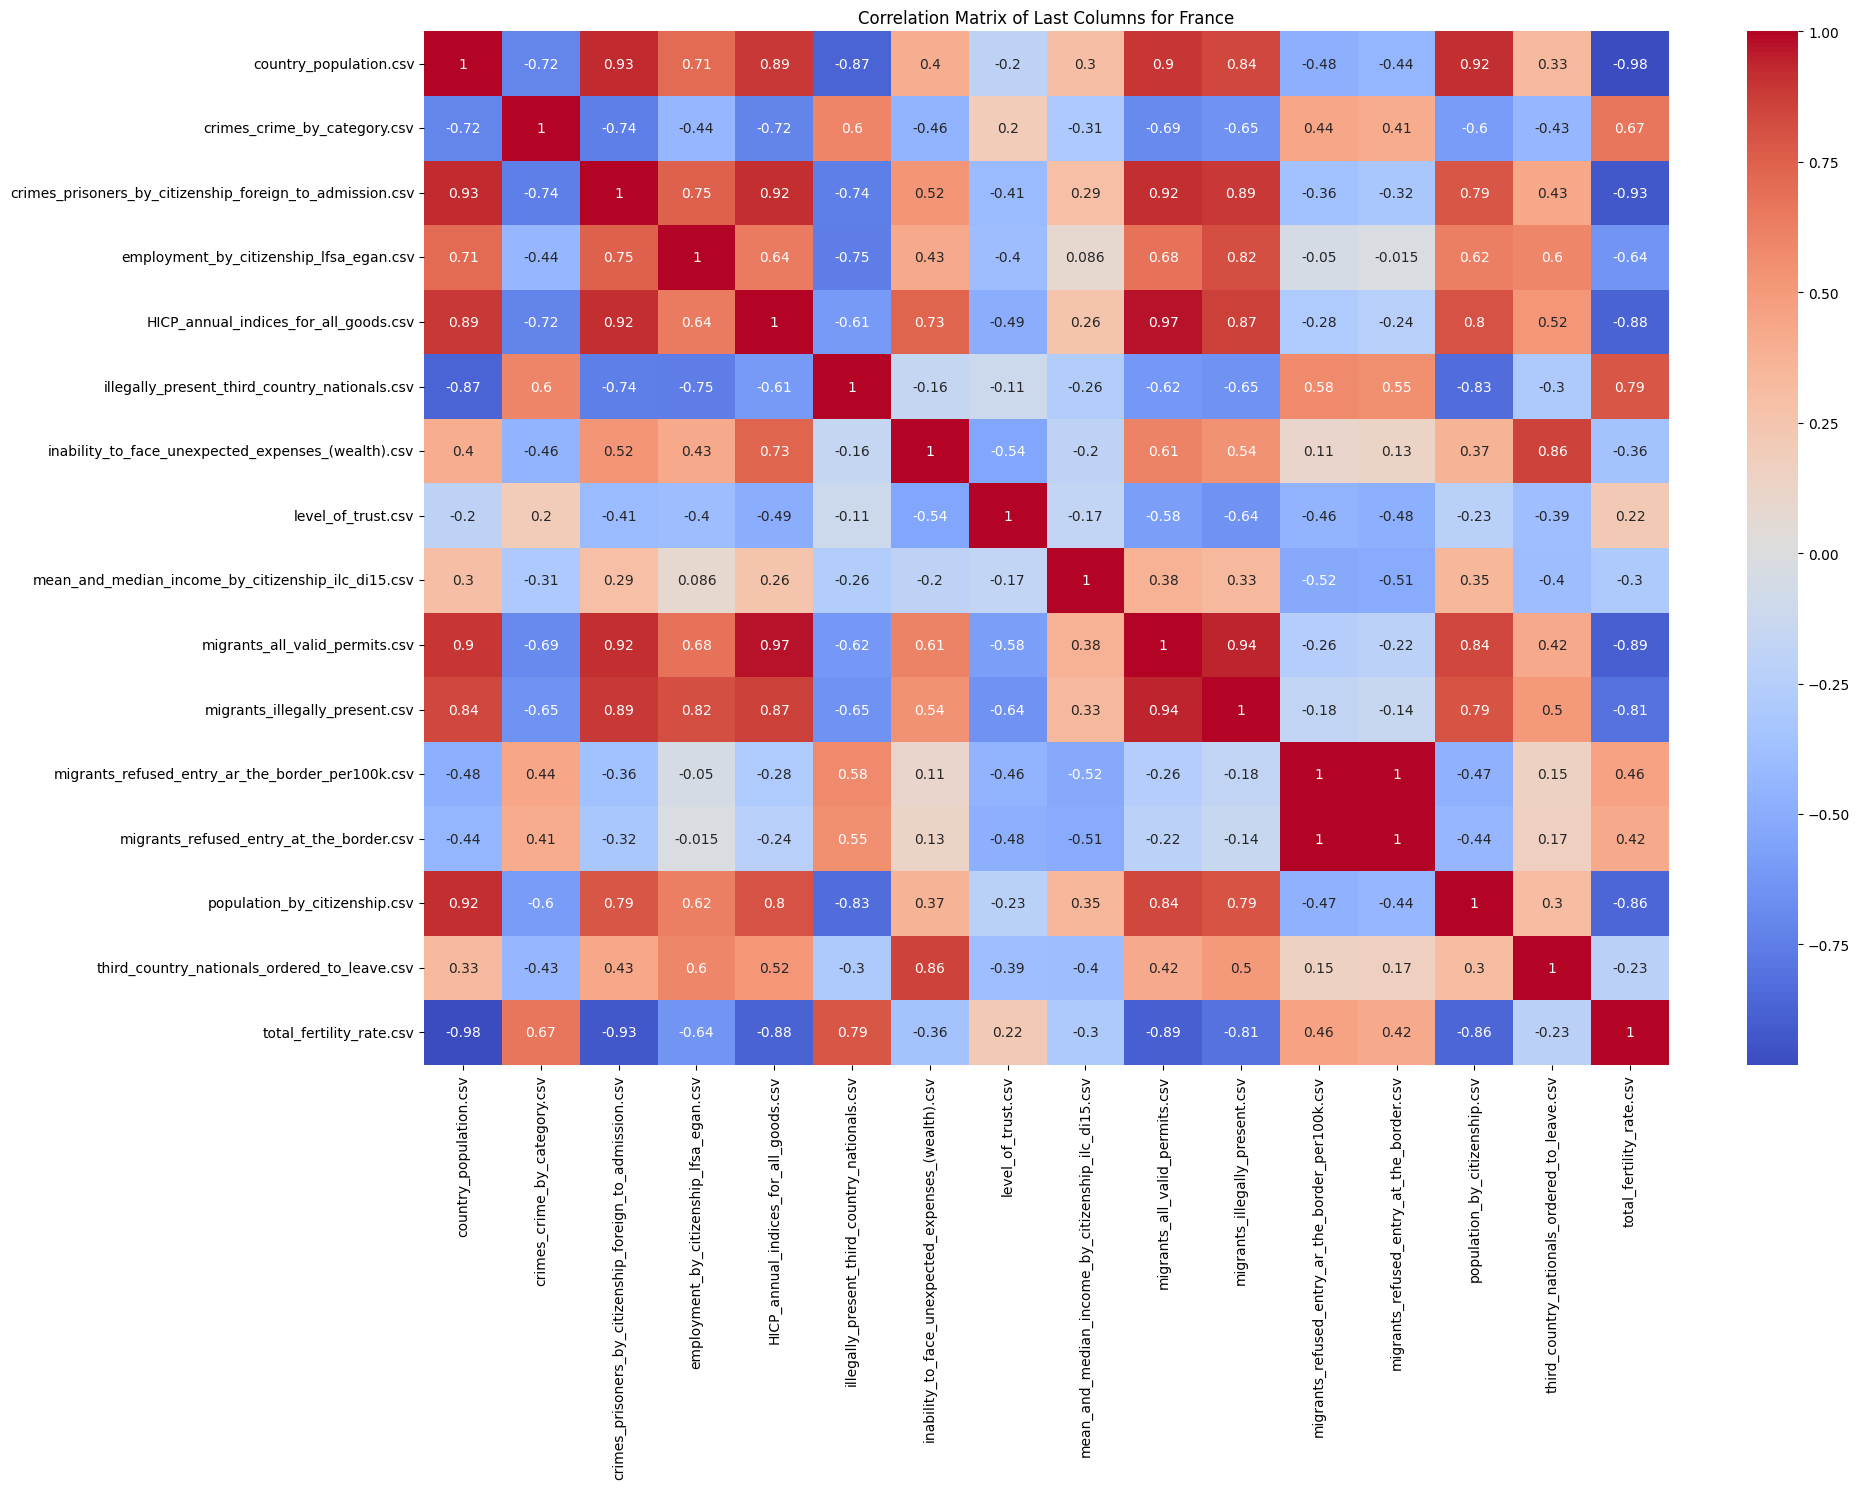

In [6]:
cor_matrix_per_country('France')

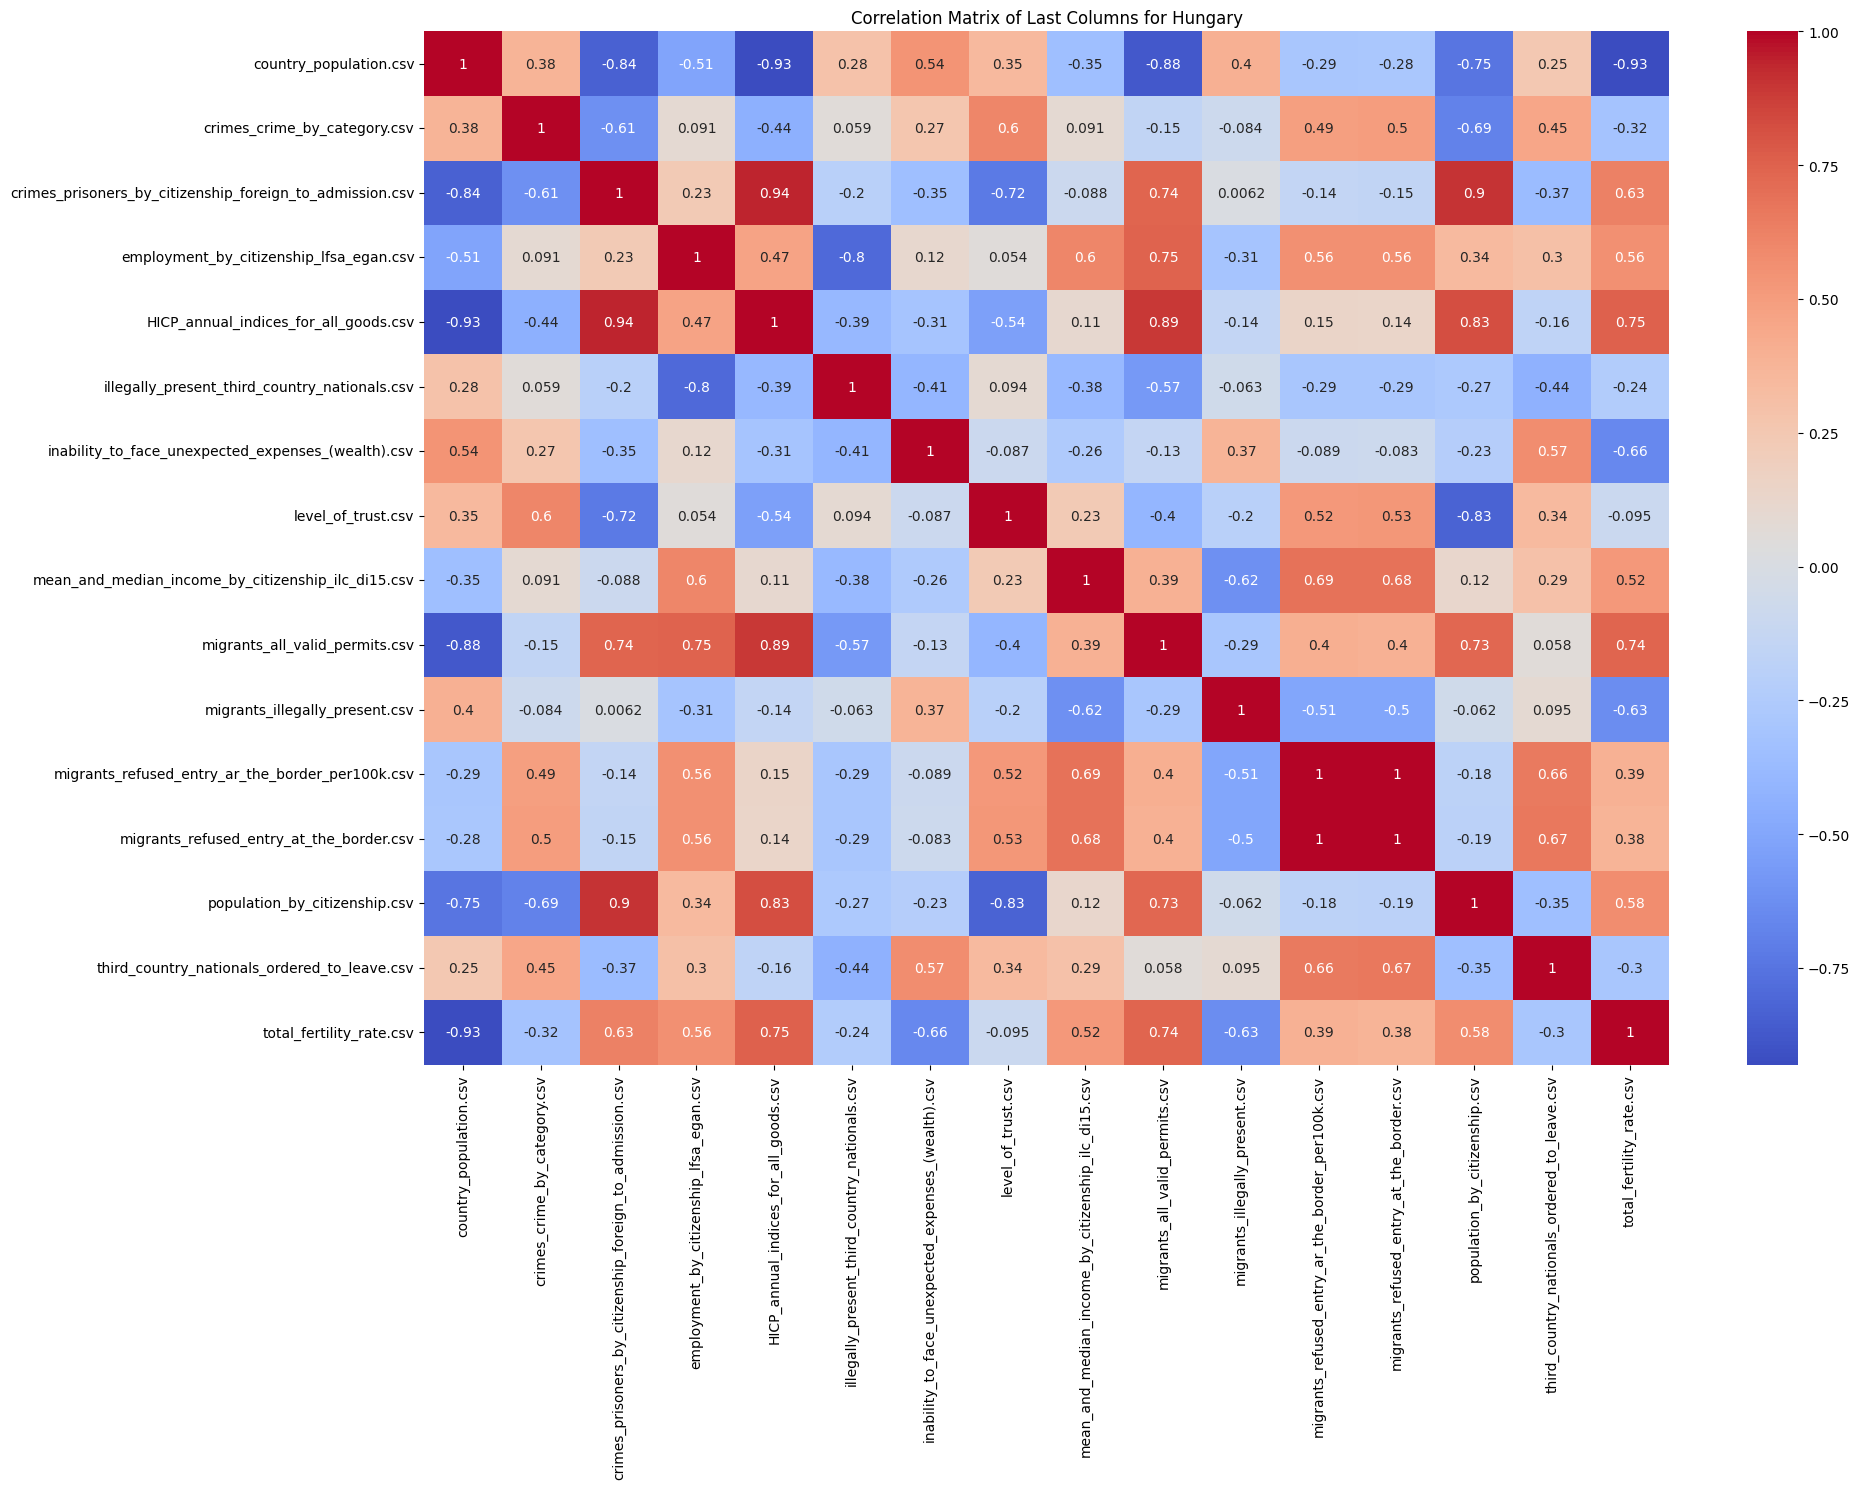

In [10]:
cor_matrix_per_country('Hungary')

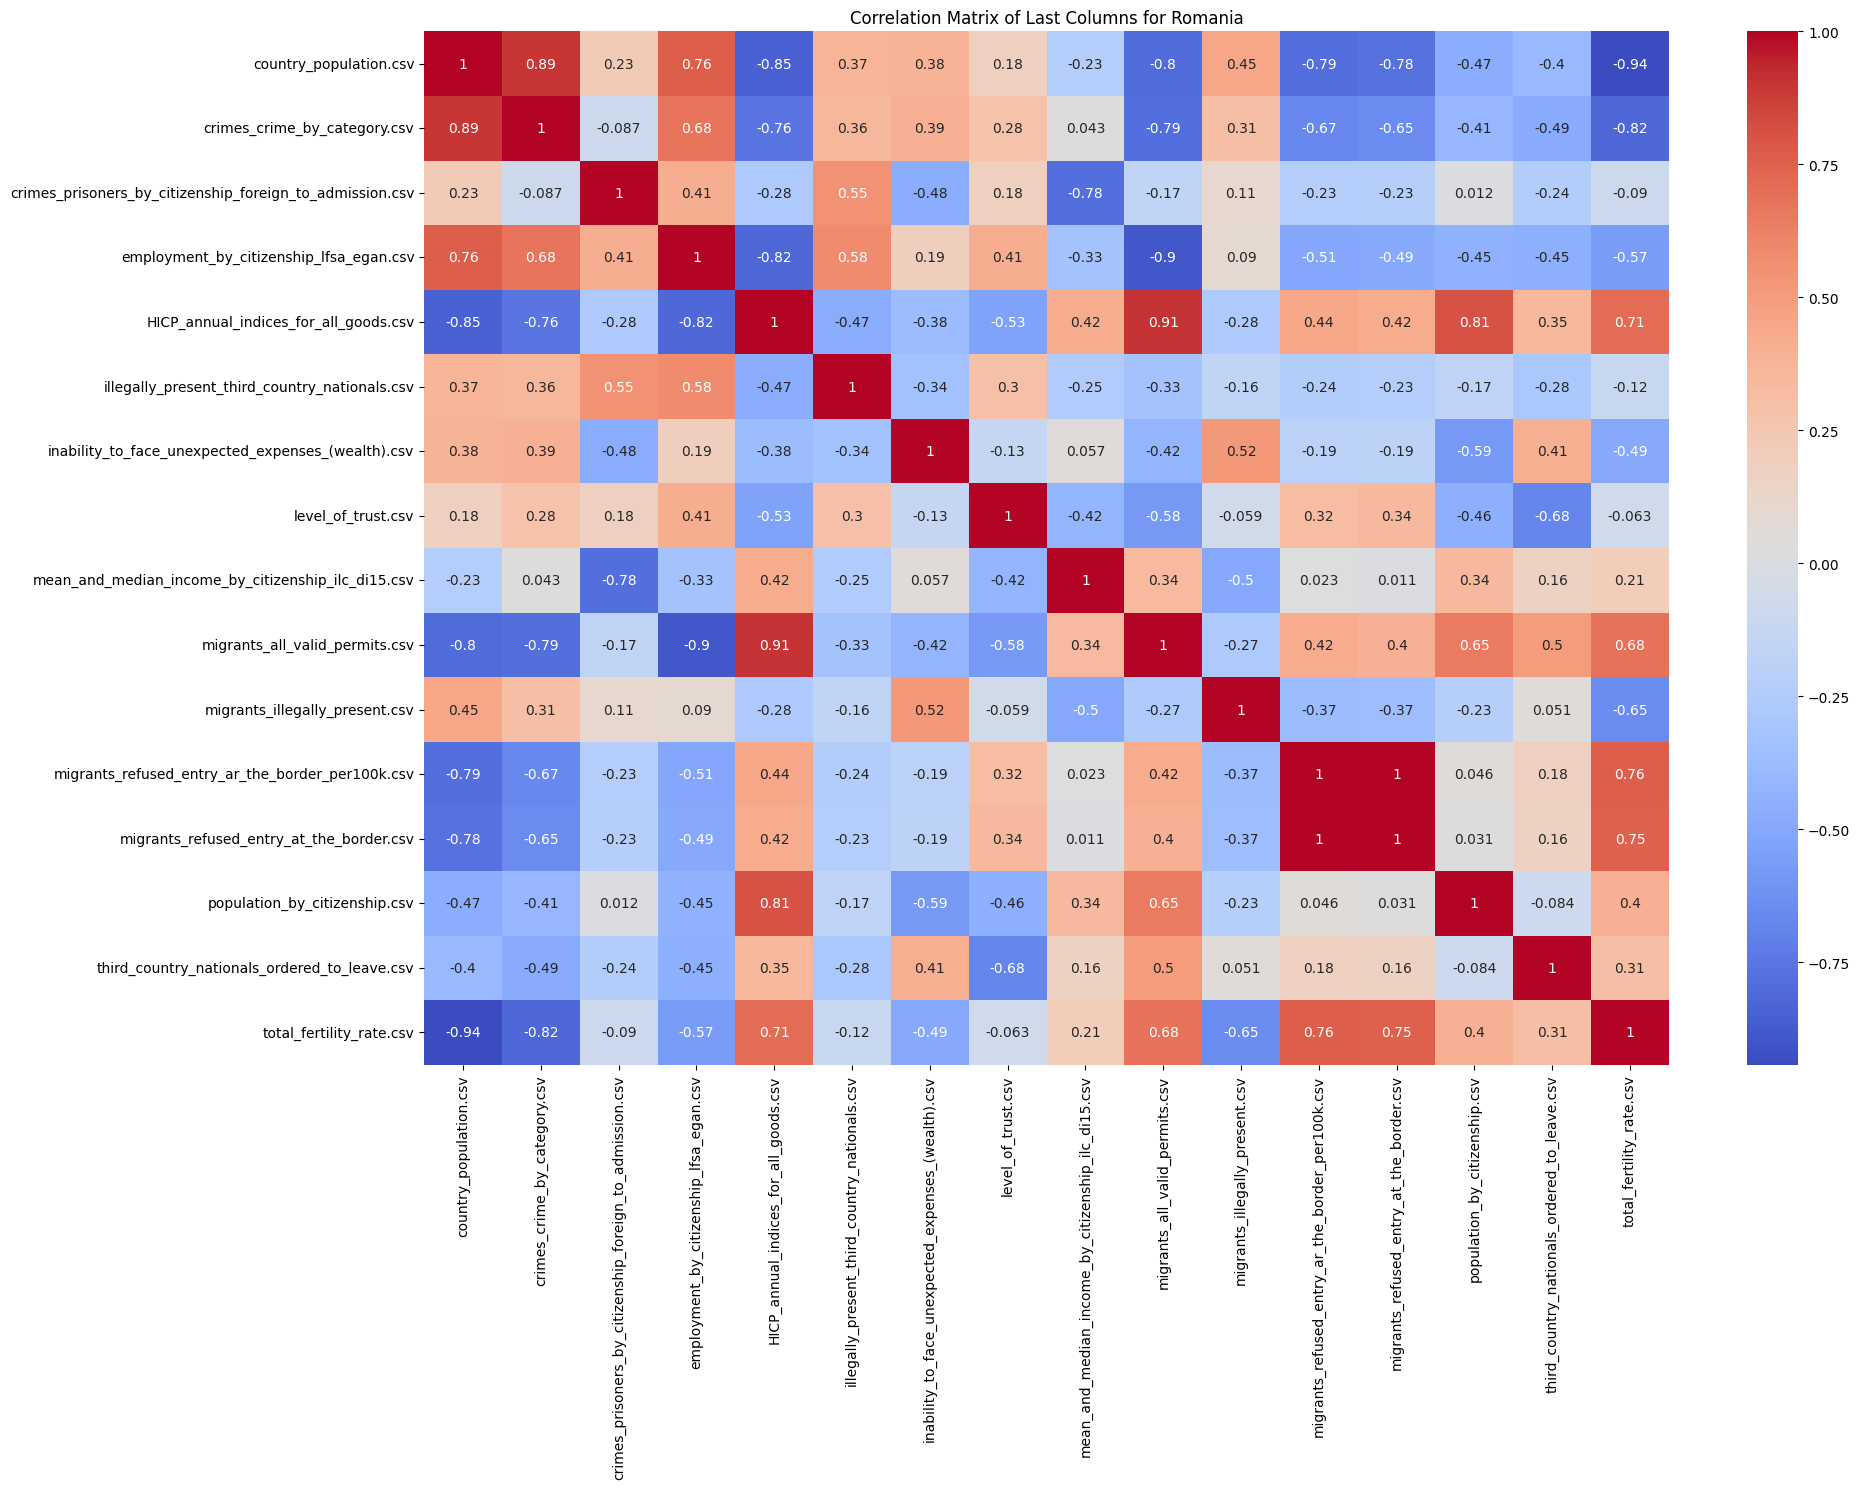

In [11]:
cor_matrix_per_country('Romania')

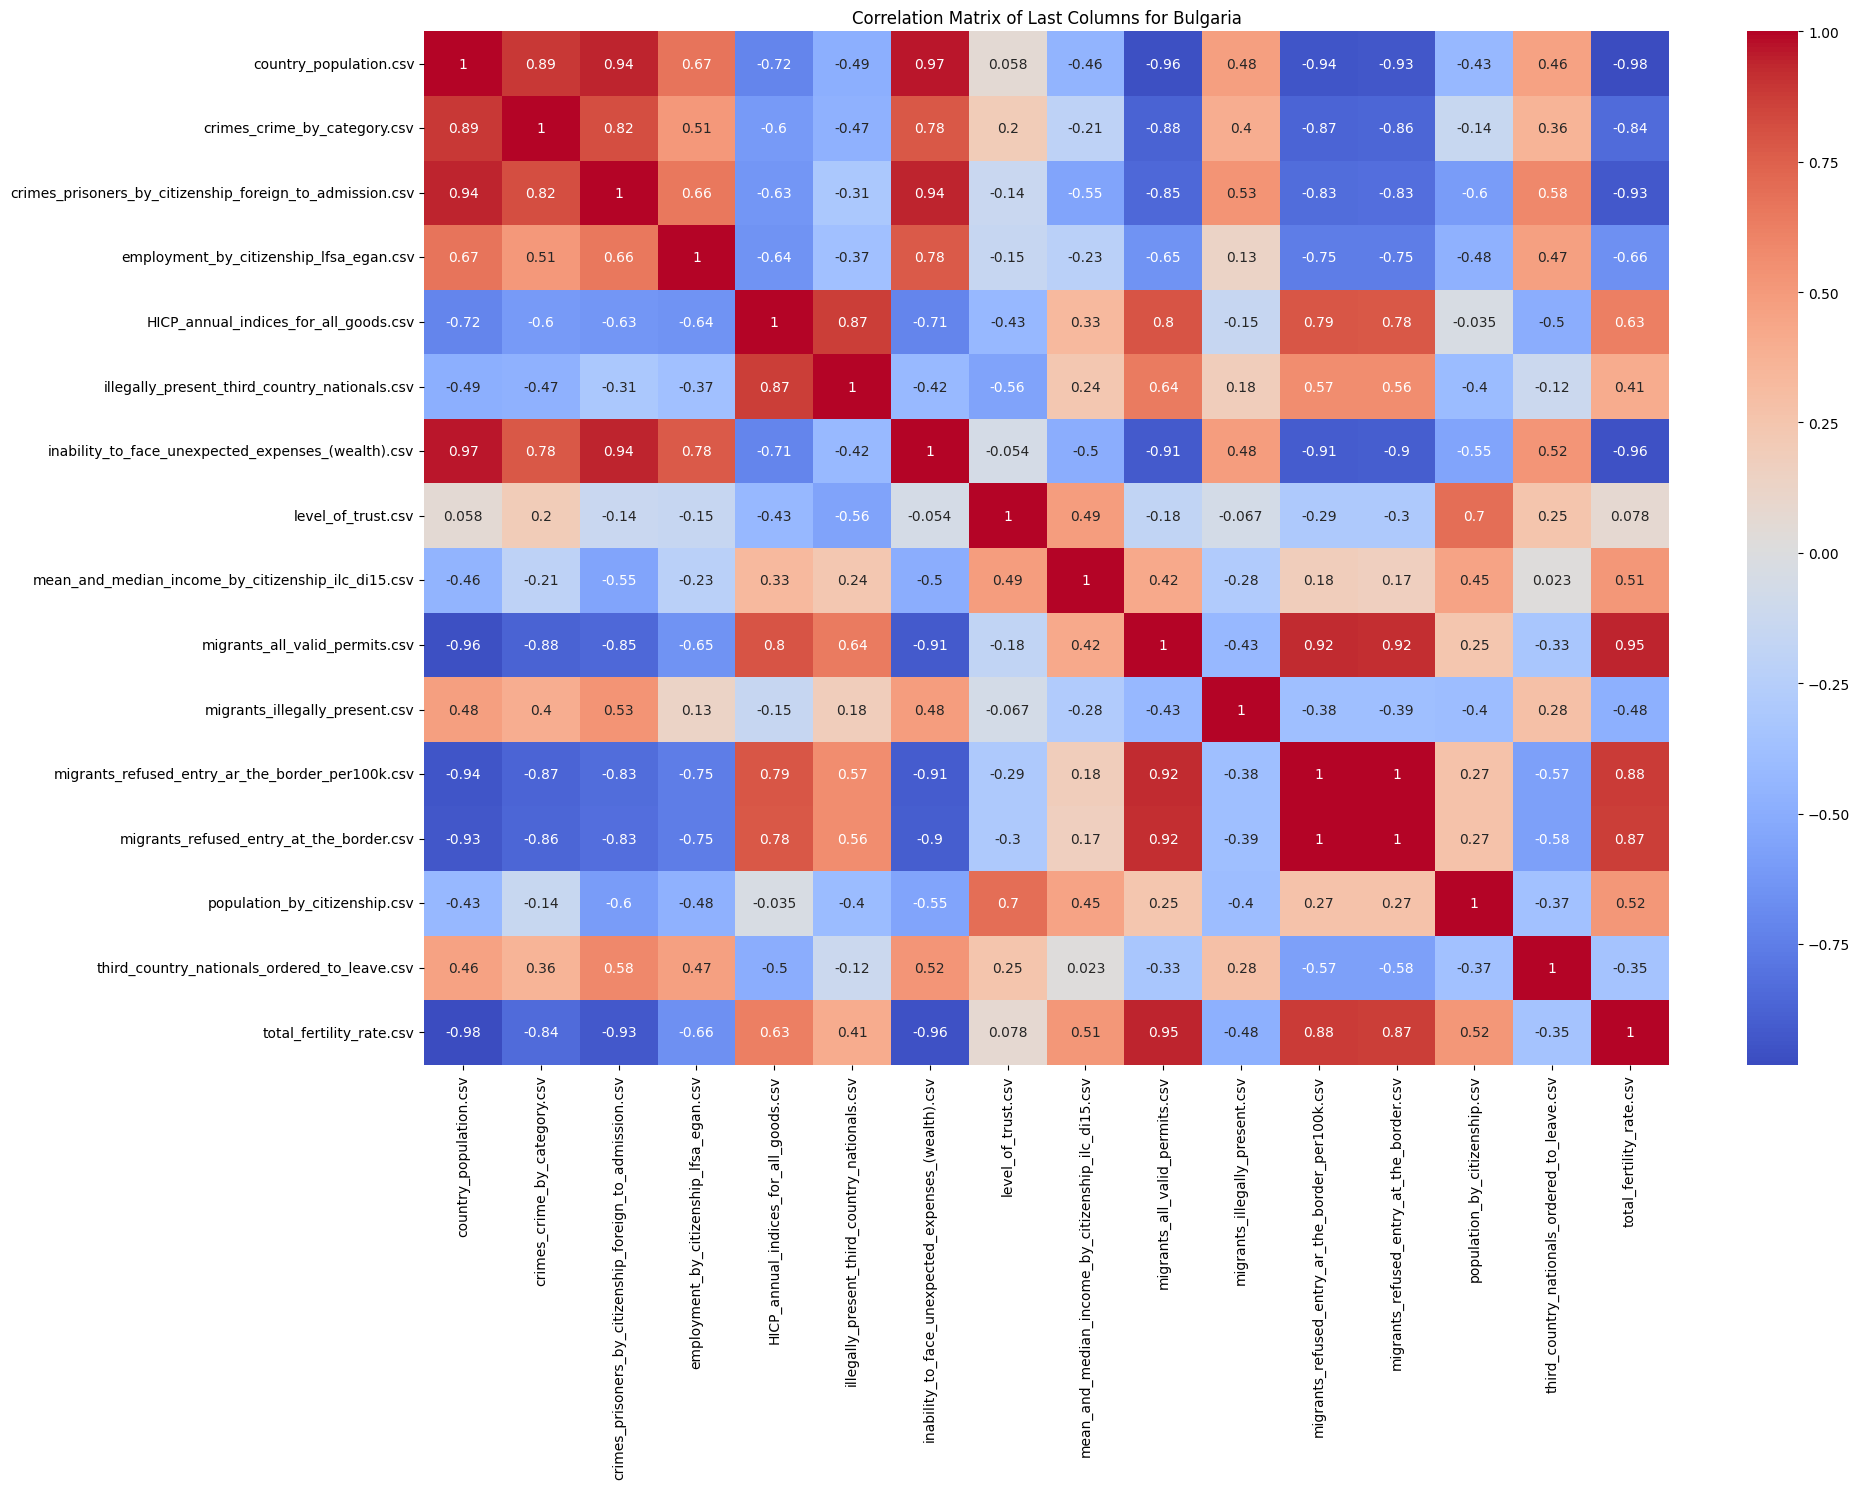

In [12]:
cor_matrix_per_country('Bulgaria')